![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
#Agregué librerías

In [7]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [9]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [10]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

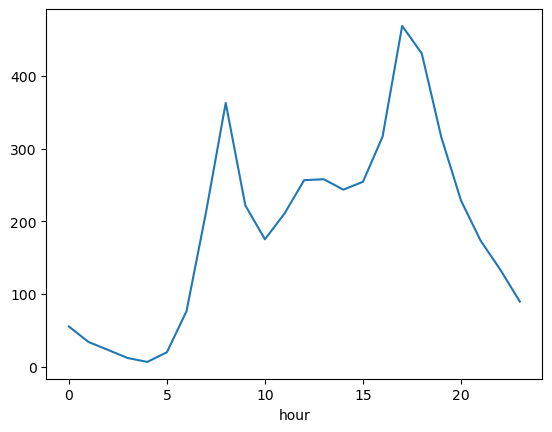

In [12]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: title={'center': 'Promedio de bicicletas rentadas por hora en invierno'}, xlabel='Hora', ylabel='Bicicletas Rentadas Promedio'>

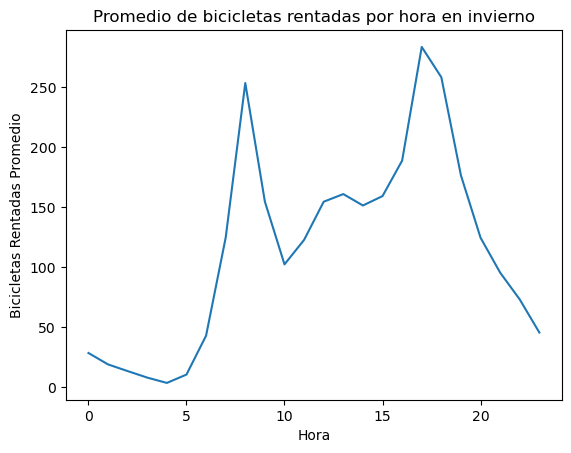

In [13]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
invierno = bikes[bikes['season'] == 1]
invierno.groupby('hour').total.mean().plot(title='Promedio de bicicletas rentadas por hora en invierno', xlabel='Hora', ylabel='Bicicletas Rentadas Promedio')

Por medio del gráfico es posible identificar que el comportamiento de las bicicletas rentadas por hora en invierno es muy similar al comportamiento general, en donde existen dos picos de bicicletas rentadas a las 8 am y a las 5-6pm. Adicionalmente, vemos que hay un pequeño pico a las 12-1pm. Por lo que podemos entender que es a la hora del inicio y final de las jornadas laborales donde existe un mayor arrendamiento, lo que indicaría que las personas pueden estar arrendando las bicicletas para desplazarse de la casa al trabajo y del trabajo a la casa. Así como también la usan para desplazarse (en menor medida) en la hora del almuerzo.

<Axes: title={'center': 'Promedio de bicicletas rentadas por hora en verano'}, xlabel='Hora', ylabel='Bicicletas Rentadas Promedio'>

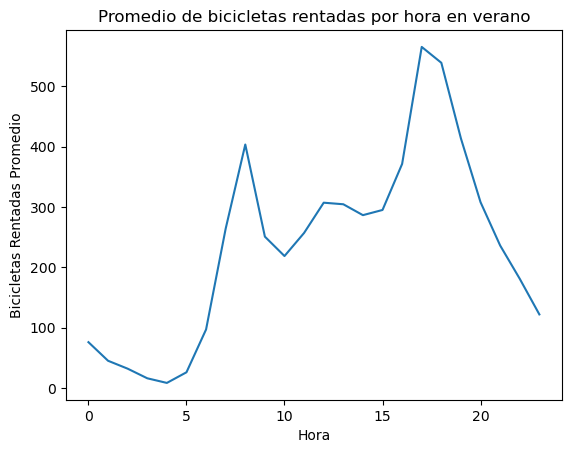

In [15]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
verano = bikes[bikes['season'] == 3]
verano.groupby('hour').total.mean().plot(title='Promedio de bicicletas rentadas por hora en verano', xlabel='Hora', ylabel='Bicicletas Rentadas Promedio')

En el verano vemos el mismo comportamiento que en invierno en cuanto a los picos, sin embargo, es posible identificar que el pico de la mañana es mucho menos marcado con respecto a el pico de la tarde, cosa que no pasa en invierno. Esto podría indicar que los usuarios rentan más la bicicleta para salir después de la hora de trabajo que para desplazarse hacia él. Indudablemente se puede ver que la magnitud de bicicletas rentadas es mayor en verano, lo que hace sentido al pensar que un clima cálido favorece más el uso de bicicletas, ya que las personas tienden a disfrutar de actividades al aire libre.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [18]:
# Celda 3

import pandas as pd
from sklearn.linear_model import LinearRegression

X = bikes[['hour', 'season']]
y = bikes['total']

regresion = LinearRegression()
regresion.fit(X, y)

print(regresion.coef_)
print(regresion.intercept_)

[10.52129824 26.95130851]
2.5848513346811615


- El coeficiente de la variable hour es 10.52, lo que indica que, manteniendo constante la estación del año, por cada hora adicional el número de bicicletas rentadas aumenta en promedio en 10.52 unidades. Este resultado es coherente con las gráficas observadas, donde se evidenció que durante las primeras horas de la madrugada se registraron menos arrendamientos. Sin embargo, esta interpretación limita el entendimiento de las horas 'pico', ya que la relación entre hour y total no sigue un patrón lineal.

- El coeficiente de la variable season es 26.95, lo que implica que, manteniendo constante la hora del día, un aumento en el valor de season (por ejemplo, pasar de invierno a primavera) incrementa el número de bicicletas rentadas en 26.95 unidades. Este resultado es coherente con la tendencia observada, donde el número de bicicletas rentadas aumenta de invierno a verano. Sin embargo, la interpretación se ve limitada al considerar que, al llegar al otoño, los alquileres disminuyen nuevamente, lo que sugiere que la relación entre season y total no es siempre ascendente.

- El intercepto es el valor de la variable dependiente (total, que en este caso es el número de bicicletas rentadas) cuando todas las variables independientes (predictoras) son iguales a cero.

La regresión lineal no parece ser el modelo más adecuado para este caso debido a que asume una relación lineal y constante entre las variables, lo cual no refleja adecuadamente el comportamiento de los datos. Por ejemplo, la relación entre las horas del día y el número de bicicletas rentadas no es lineal, ya que hay horas "pico" de mayor demanda y otras con poca actividad. Asimismo, las estaciones del año no siguen un patrón lineal constante, ya que, aunque la renta de bicicletas aumenta de invierno a verano, disminuye nuevamente en otoño. Estos comportamientos no pueden ser capturados adecuadamente por un modelo lineal simple.

In [20]:
#Punto 3 (no con todo el conjunto de datos, como se afirma en el enunciado, con el fin de responder al punto 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regresion2 = LinearRegression()
regresion2.fit(X_train, y_train)

y_pred = regresion2.predict(X_test)

#MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE Regresión Lineal: {mse}")

MSE Regresión Lineal: 26898.274894466886


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [22]:
# Celda 4

#Teniendo en cuenta el codigo del laboratorio
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        p = y.mean()
        return 1 - (p ** 2 + (1 - p) ** 2)

def gini_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    if n_l == 0 or n_r == 0:
        return 0
    
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = (n_l / (n_l + n_r)) * gini_l + (n_r / (n_l + n_r)) * gini_r
    
    return gini_impurity_

def best_split(X, y, num_pct=10):
    features = range(X.shape[1])
    best_split = [0, 0, float('inf')]
    
    for j in features:
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        for split in splits:
            gini_gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gini_gain < best_split[2]:
                best_split = [j, split, gini_gain]
    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    j, split, gini_gain = best_split(X, y, num_pct)
    
    y_pred = int(y.mean() >= 0.5)
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gini_gain)
    
    if gini_gain > min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree


tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)


{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': -91286.95959580078,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': -13243.496687253028,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': -2704.814510705637,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': -1600.2885420040504},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': -12221.550986611068}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [1, 2.0],
   'n_samples': 455,
   'gain': -95608.1452315836,
   'sl': {'y_pred': 1,
    'y_prob': 122.27826086956522,
    'level': 3,
    'split': -1,
    'n_samples': 113,
    'gain': inf},
   'sr': {'y_pred': 1,


El árbol de decisiones muestra cómo "hour" y "season" afectan las rentas de bicicletas. La división por "hour" resalta la importancia de la hora del día, con diferencias claras en los alquileres según el momento del día. Por otro lado, "season" refleja cómo las estaciones del año impactan las rentas, con patrones distintos entre invierno y verano.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

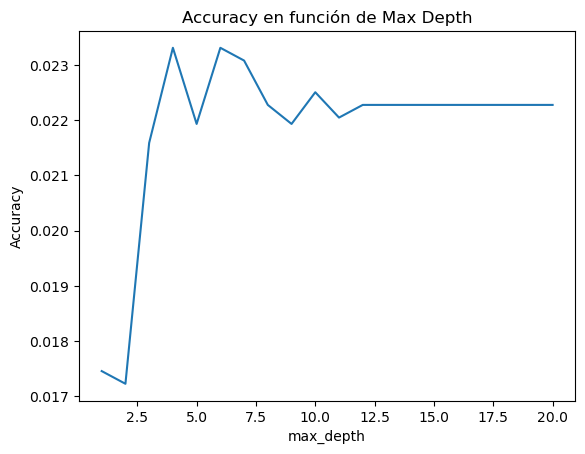

Max_depth óptimo: 4
Precisión: 0.02800734618916437
MSE del modelo de árbol de decisión: 153.3982555095997


In [25]:
# Celda 5
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

max_depth_range = range(1, 21)

accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy en función de Max Depth')
plt.show()

best_max_depth = sorted(zip(accuracy_scores, max_depth_range), reverse=True)[0][1]
print(f"Max_depth óptimo: {best_max_depth}")

clf = DecisionTreeClassifier(max_depth=best_max_depth, random_state=1)
clf.fit(X_train, y_train)

accuracy_val = clf.score(X_val, y_val)
print(f"Precisión: {accuracy_val}")


#Desempeño

y_pred = clf.predict(X_val)

#MSE
mse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"MSE del modelo de árbol de decisión: {mse}")


A pesar de que el max_depth óptimo del modelo de árbol de decisión es 4, la precisión (accuracy) en el conjunto de validación en este punto sigue siendo bastante baja (0.028). Esto sugiere que, aunque el árbol de decisión no esté sobreajustado, no está capturando bien las relaciones en los datos de validación.

No obstante, el MSE (Error Cuadrático Medio) del modelo de regresión lineal es significativamente más alto (26898.27) en comparación con el MSE del modelo de árbol de decisión (153.40). Este resultado muestra que, aunque el accuracy del árbol de decisión es bajo, este modelo tiene un rendimiento mejor en términos de las predicciones, ya que el error entre las predicciones y los valores reales es menor en el árbol de decisión que en la regresión lineal.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [29]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [30]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [31]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [33]:
# Celda 6

from sklearn.metrics import accuracy_score, f1_score

# Árbol de Decisión calibrando el max depth
max_depth_range = range(1, 21)

best_accuracy = 0
best_f1_score = 0
best_depth = 0


for depth in max_depth_range:

    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Accuracy y F1-Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_f1_score = f1
        best_depth = depth

print("Desempeño del árbol de decisión:")
print(f"Max_depth óptimo: {best_depth}")
print(f"Accuracy:{best_depth}: {best_accuracy:.4f}")
print(f"F1-Score:{best_depth}: {best_f1_score:.4f}")


#Regresión logística

reg_log = LogisticRegression(random_state=1, max_iter=1000)
reg_log.fit(X_train, y_train)


y_pred_rl = reg_log.predict(X_test)

#Accuracy y F1-Score
accuracy_rl = accuracy_score(y_test, y_pred_rl)
f1_rl = f1_score(y_test, y_pred_rl,average='macro')


print("Desempeño de la Regresión Logística:")
print(f"Accuracy: {accuracy_rl}")
print(f"F1-Score: {f1_rl}")

Desempeño del árbol de decisión:
Max_depth óptimo: 4
Accuracy:4: 0.6513
F1-Score:4: 0.6506
Desempeño de la Regresión Logística:
Accuracy: 0.6173333333333333
F1-Score: 0.6170330872737559


Estos resultados indican que el Árbol de Decisión supera a la Regresión Logística en términos de Accuracy y F1-Score, pues estos valores son mayores para el arbol. Esto sugiere que, en este caso particular, el Árbol de Decisión es más eficaz para la tarea de clasificación de este problema.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [72]:
# Celda 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

n_estimators = 100
max_depth = 7
min_samples_leaf = 5

def random_samples(data, n_estimators):
    n_samples = data.shape[0]
    samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]
    return samples

arboles_max_depth = []
arboles_min_samples_leaf = []
reg_logistica = []

#Árboles con Max Depth
for i in range(n_estimators):
    samples = random_samples(X_train,n_estimators)
    X_sample = X_train.iloc[samples[i]]
    y_sample = y_train.iloc[samples[i]]
    
    tree = DecisionTreeClassifier(max_depth=max_depth) 
    tree.fit(X_sample, y_sample)
    arboles_max_depth.append(tree)

#Árboles con min_leaf
for i in range(n_estimators):
    samples = random_samples(X_train,n_estimators)
    X_sample = X_train.iloc[samples[i]]
    y_sample = y_train.iloc[samples[i]]
    
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    tree.fit(X_sample, y_sample)
    arboles_min_samples_leaf.append(tree)

#Regresión logística
for i in range(n_estimators):
    samples = random_samples(X_train,n_estimators)
    X_sample = X_train.iloc[samples[i]]
    y_sample = y_train.iloc[samples[i]]
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_sample, y_sample)
    reg_logistica.append(model)

#Evaluación modelos
y_pred_1 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
y_pred_2 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
y_pred_3 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    y_pred_1.iloc[:, i] = arboles_max_depth[i].predict(X_test)
    y_pred_2.iloc[:, i] = arboles_min_samples_leaf[i].predict(X_test)
    y_pred_3.iloc[:,i]= reg_logistica[i].predict(X_test)

#Votación mayoritaria para cada tipo
y_pred1 = (y_pred_1.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)
y_pred2 = (y_pred_2.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)
y_pred3 = (y_pred_3.sum(axis=1) >= (n_estimators / 2)).astype(np.int64)

from sklearn import metrics

f1_1 = metrics.f1_score(y_pred1, y_test)
accuracy_1 = metrics.accuracy_score(y_pred1, y_test)

f1_2 = metrics.f1_score(y_pred2, y_test)
accuracy_2 = metrics.accuracy_score(y_pred2, y_test)

f1_3 = metrics.f1_score(y_pred3, y_test)
accuracy_3 = metrics.accuracy_score(y_pred3, y_test)

print(f'F1-Score arboles max depth: {f1_1}')
print(f'Accuracy arboles max depth: {accuracy_1}')
print(f'F1-Score arboles min_sample: {f1_2}')
print(f'Accuracy arboles min_sample: {accuracy_2}')
print(f'F1-Score Rl: {f1_3}')
print(f'Accuracy RL: {accuracy_3}')

n_total = 300
todos = arboles_max_depth + arboles_min_samples_leaf + reg_logistica
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_total)))


for i in range(n_total):
    y_pred_df.iloc[:, i] = todos[i].predict(X_test)


#Votación Mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (n_total / 2)).astype(np.int64)

#Desempeño

f1_mayoritaria = metrics.f1_score(y_pred, y_test)
accuracy_mayoritaria = metrics.accuracy_score(y_pred, y_test)
print(f'F1-Score_ensemble: {f1_mayoritaria}')
print(f'Accuracy_ensemble: {accuracy_mayoritaria}')


F1-Score arboles max depth: 0.655688622754491
Accuracy arboles max depth: 0.6515151515151515
F1-Score arboles min_sample: 0.6390711761736497
Accuracy arboles min_sample: 0.6388888888888888
F1-Score Rl: 0.6144896879957694
Accuracy RL: 0.6318181818181818
F1-Score_ensemble: 0.6332288401253918
Accuracy_ensemble: 0.6454545454545455


En resumen, los árboles con máximo de profundidad ofrecen el mejor rendimiento tanto en F1-Score (0.6677) como en Accuracy (0.6631), superando a los árboles con mínimo de muestras y a la regresión logística. El ensemble de todos los modelos con votación mayoritaria, a pesar de combinar varios enfoques, no mejoró el rendimiento en términos de F1-Score (0.6332) ni de Accuracy (0.6455), resultando incluso peor que los árboles con máximo de profundidad. Esto puede pasar ya que al tener en cuenta el modelo de la regresión logística (peor rendimiento) y al combinarlo con los de mejor rendimiento resulta en empeorar el resultado. 

*Es importante tener en cuenta que aquí se calcularon las métricas de los modelos individuales realizando validación mayoritaria*.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [60]:
# Celda 8
# Utilicé el proceso del punto 7

#El peso será el error OOB (Out-of-Bag) como en el laboratorio
n_samples = X_train.shape[0]
samples_oob = []

samples = random_samples(X_train, n_estimators)
for sample in samples:
    oob_samples = sorted(set(range(n_samples)) - set(sample))
    samples_oob.append(oob_samples)

errors = np.zeros(n_total)

for i in range(n_total):
    oob_sample = samples_oob[i % n_estimators] 
    y_pred_ = todos[i].predict(X_train.iloc[oob_sample])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[oob_sample], y_pred_)

alpha = (1 - errors) / (1 - errors).sum()

weighted_sum = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum.head(20)

y_pred_ponderada = (weighted_sum >= 0.5).astype(np.int64)
    
#Desempeño

f1_ponderada = metrics.f1_score(y_pred_ponderada, y_test)
accuracy_ponderada = metrics.accuracy_score(y_pred_ponderada, y_test)
print(f'F1-Score: {f1_ponderada}')
print(f'Accuracy: {accuracy_ponderada}')

F1-Score: 0.6377870563674322
Accuracy: 0.6494949494949495


El modelo con votación ponderada logró un F1-Score de 0.6378 y una Accuracy de 0.6495. Comparado con los modelos individuales, el árbol con máximo de profundidad sigue siendo el mejor en términos de F1-Score y Accuracy.

In [63]:
# Otra forma con accuracy porque dio bajo con OOB

weights = []
for model in todos:
    y_pred_model = model.predict(X_test)
    weight = accuracy_score(y_test, y_pred_model)  
    weights.append(weight)

# Votación ponderada
y_pred_ponderada2 = np.dot(y_pred_df, weights) / sum(weights) 
y_pred_ponderada2  = (y_pred_ponderada2  >= 0.5).astype(np.int64) 

accuracy_ponderada2 = accuracy_score(y_test, y_pred_ponderada2 )
f1_ponderada2 = f1_score(y_test, y_pred_ponderada2 )

print(f'F1-Score: {f1_ponderada2}')
print(f'Accuracy: {accuracy_ponderada2}')

F1-Score: 0.6324607329842932
Accuracy: 0.6454545454545455


El aproach con Accuracy dio un accuracy ligeramente superior pero menor F1-Score. Los resultados son muy similares.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

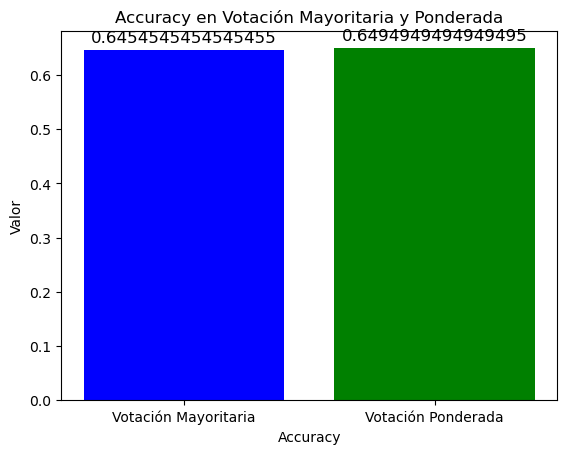

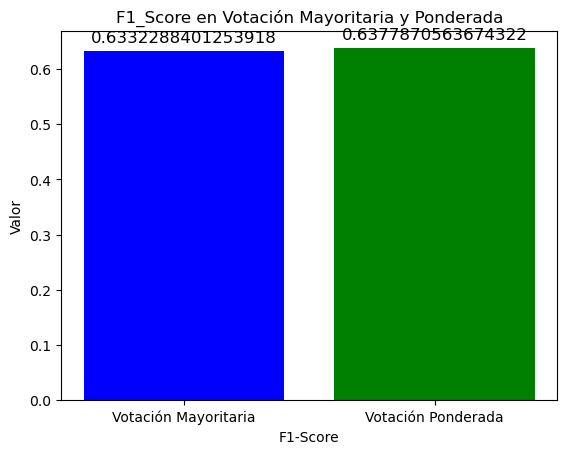

In [70]:
# Celda 9

#ACCURACY
metrics = ['Votación Mayoritaria', 'Votación Ponderada']
values = [accuracy_mayoritaria,accuracy_ponderada]

plt.bar(metrics, values, color=['blue', 'green'])

plt.xlabel('Accuracy')
plt.ylabel('Valor')
plt.title('Accuracy en Votación Mayoritaria y Ponderada')

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

#F1-Score

metrics = ['Votación Mayoritaria', 'Votación Ponderada']
values = [f1_mayoritaria,f1_ponderada]

plt.bar(metrics, values, color=['blue', 'green'])

plt.xlabel('F1-Score')
plt.ylabel('Valor')
plt.title('F1_Score en Votación Mayoritaria y Ponderada')

for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12)

plt.show()


En este caso, la votación ponderada alcanzó un mejor accuracy (0.6495) y F1-score (0.6378) que la votación mayoritaria, aunque la diferencia es pequeña. La ventaja principal de la votación ponderada es que otorga mayor peso a los clasificadores más precisos, lo que puede ser beneficioso cuando los modelos son heterogéneos y tienen rendimientos diferentes, lo que sucede en este caso y podemos entender al comparar el rendimiento de los arboles de decisión vs la regresión logística. No obstante, su efectividad depende de un ajuste adecuado de los pesos. Si los pesos no se asignan correctamente, podría terminar favoreciendo a clasificadores débiles.

Por otro lado, la votación mayoritaria es más robusta frente a clasificadores de bajo rendimiento, ya que se basa en la decisión de la mayoría. Su principal desventaja es que no tiene en cuenta la calidad de los clasificadores individuales, lo que puede ser problemático si algunos modelos son significativamente mejores que otros. Sin embargo, vale le pena volver a resaltar que la diferencia entre las dos votaciones fue mínima, lo que indica que en este caso, ambos métodos tienen sus ventajas y limitaciones.

No obstante, es importante mencionar que los modelos (ensamblados) que tuvieron mejor rendimiento fueron los arboles de decisión, especialmente el que se controló con el max_depth. Estos también se ensamblaron con votación mayoritaria. Esto puede ocurrir porque al incluir la regresión logística, que tiene un rendimiento inferior, en el ensamblaje, se reduce el rendimiento general del modelo.